C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


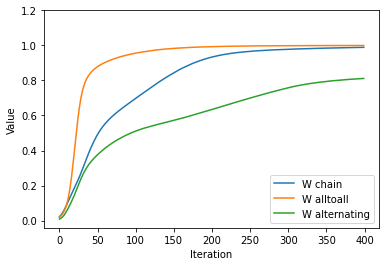

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
path = "../../experiments/tomography_wchain_5/5/fidelities.csv"
fidelities1 = pd.read_csv(path, sep=",", header=None)
fidelities1 = fidelities1.applymap(lambda s: complex(s.replace('i', 'j'))).values
path = "../../experiments/tomography_wchain_5/5/traces.csv"
traces1 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_5/5/loss_values.csv"
loss_values1 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_walltoall_5/5/fidelities.csv"
fidelities2 = pd.read_csv(path, sep=",", header=None)
fidelities2 = fidelities2.applymap(lambda s: complex(s.replace('i', 'j'))).values
path = "../../experiments/tomography_walltoall_5/5/loss_values.csv"
loss_values2 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_walltoall_5/5/traces.csv"
traces2 = pd.read_csv(path, sep=",", header=None)

path = "../../experiments/tomography_walternating_5/5/fidelities.csv"
fidelities3 = pd.read_csv(path, sep=",", header=None)
fidelities3 = fidelities3.applymap(lambda s: complex(s.replace('i', 'j'))).values
path = "../../experiments/tomography_walternating_5/5/loss_values.csv"
loss_values3 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_walternating_5/5/traces.csv"
traces3 = pd.read_csv(path, sep=",", header=None)

plt.plot(fidelities1, label = 'W chain')
plt.plot(fidelities2, label = 'W alltoall')
plt.plot(fidelities3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

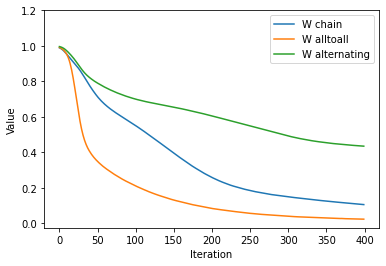

In [2]:
plt.plot(traces1, label = 'W chain')
plt.plot(traces2, label = 'W alltoall')
plt.plot(traces3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

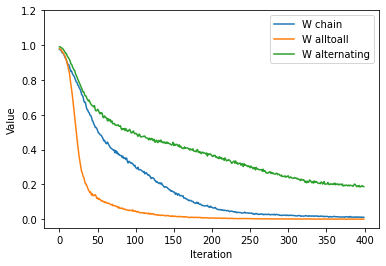

In [3]:
plt.plot(loss_values1, label = 'W chain')
plt.plot(loss_values2, label = 'W alltoall')
plt.plot(loss_values3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()